<a href="https://colab.research.google.com/github/Daniel-Thanh/skills-introduction-to-github/blob/main/Week9_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Tasks — Data Mining with Python

This notebook demonstrates fundamental data mining techniques including association rule mining, clustering, classification, and anomaly detection.

**Author:** Tran Ho Chi Thanh  
**Date:** 12/11/2025


## Load Required Libraries


In [ ]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data mining algorithms
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.decomposition import PCA

# Association rule mining
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set plotting style
sns.set_theme(style='whitegrid')
%matplotlib inline

print("Libraries loaded successfully!")


Libraries loaded successfully!


---

## Task 1 — Association Rule Mining

In this task, we'll discover frequent itemsets and generate association rules from transactional data.


### Load Transactional Dataset


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aslanahmedov/market-basket-analysis")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'market-basket-analysis' dataset.
Path to dataset files: /kaggle/input/market-basket-analysis


In [ ]:
transactions = pd.read_csv("/kaggle/input/market-basket-analysis/Assignment-1_Data.csv",delimiter=";")
transactions

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France


Cleaning the Dataset

In [ ]:
transactions.dropna(subset=['Itemname'],inplace=True)

In [ ]:
transactions.drop_duplicates(inplace=True)

### Preprocess Data for Apriori Algorithm


In [ ]:
transactions['Itemname'] = transactions['Itemname'].str.strip()
transactions.dropna(axis=0, subset=['BillNo', 'Itemname'], inplace=True)
transactions = transactions[~transactions['Itemname'].isnull()]

# Group items by BillNo to create a list of items for each transaction
transaction_list = transactions.groupby(['BillNo'])['Itemname'].apply(list).reset_index(name='items')['items'].tolist()

# Transform transactions into a binary matrix
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Transaction matrix shape: {df_transactions.shape}")
print(f"\nFirst few rows:")
display(df_transactions.head())

Transaction matrix shape: (20210, 4185)

First few rows:


*Boombox Ipod Classic  *USB Office Mirror Ball  10 COLOUR SPACEBOY PEN  \
0                  False                    False                   False   
1                  False                    False                   False   
2                  False                    False                   False   
3                  False                    False                   False   
4                  False                    False                   False   

   12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3                       False                      False   
4                       False                      False   

   12 EGG HOUSE PAINTED WOOD  12 HANGING EGGS HAND PAINTED  \
0                      False                         False   
1                      False                         False   
2                      False                         False   
3                      False                         False   
4                      False                         False   

   12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  \
0                             False                            False   
1                             False                            False   
2                             False                            False   
3                             False                            False   
4                             False                            False   

   12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  \
0                          False                                False   
1                          False                                False   
2                          False                                False   
3                          False                                False   
4                          False                                False   

   12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  \
0                        False                      False   
1                        False                      False   
2                        False                      False   
3                        False                      False   
4                        False                      False   

   12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE SKULLS  \
0                               False                        False   
1                               False                        False   
2                               False                        False   
3                               False                        False   
4                               False                        False   

   12 PENCILS TALL TUBE WOODLAND  12 PINK HEN+CHICKS IN BASKET  \
0                          False                         False   
1                          False                         False   
2                          False                         False   
3                          False                         False   
4                          False                         False   

   12 PINK ROSE PEG PLACE SETTINGS  12 RED ROSE PEG PLACE SETTINGS  \
0                            False                           False   
1                            False                           False   
2                            False                           False   
3                            False                           False   
4                            False                           False   

   15 PINK FLUFFY CHICKS IN BOX  15CM CHRISTMAS GLASS BALL 20 LIGHTS  \
0                         False                                False   
1                         False                                False   
2                         False                                False   
3                         False         

### Find Frequent Itemsets


In [ ]:
# Set minimum support threshold (e.g., 0.1 means item appears in at least 10% of transactions)
min_support = 0.03

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df_transactions, min_support=min_support, use_colnames=True)

print(f"Number of frequent itemsets: {len(frequent_itemsets)}")
print(f"\nFrequent itemsets:")
frequent_itemsets.sort_values('support', ascending=False)


Number of frequent itemsets: 125

Frequent itemsets:


,support,itemsets
114,0.108956,(WHITE HANGING HEART T-LIGHT HOLDER)
46,0.102128,(JUMBO BAG RED RETROSPOT)
92,0.094211,(REGENCY CAKESTAND 3 TIER)
77,0.081940,(PARTY BUNTING)
63,0.076249,(LUNCH BAG RED RETROSPOT)
...,...,...
107,0.030876,(SMALL WHITE HEART OF WICKER)
56,0.030628,(LOVE BUILDING BLOCK WORD)
18,0.030430,(DOORMAT UNION FLAG)
93,0.030134,(RETROSPOT HEART HOT WATER BOTTLE)


### Generate Association Rules


In [ ]:
# Generate association rules
min_confidence = 0.05  # Minimum confidence threshold

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Sort by lift (higher lift = stronger association)
rules = rules.sort_values('lift', ascending=False)

print(f"Number of association rules: {len(rules)}")
print(f"\nTop 10 rules by lift:")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


Number of association rules: 12

Top 10 rules by lift:


,antecedents,consequents,support,confidence,lift
3,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.036170,0.721619,14.957866
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.036170,0.749744,14.957866
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.031321,0.616358,12.881698
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.031321,0.654602,12.881698
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.040524,0.396802,6.622110
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.040524,0.676301,6.622110
10,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.031272,0.410123,6.578247
11,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.031272,0.501587,6.578247
8,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.035675,0.612054,5.993032
9,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.035675,0.349322,5.993032


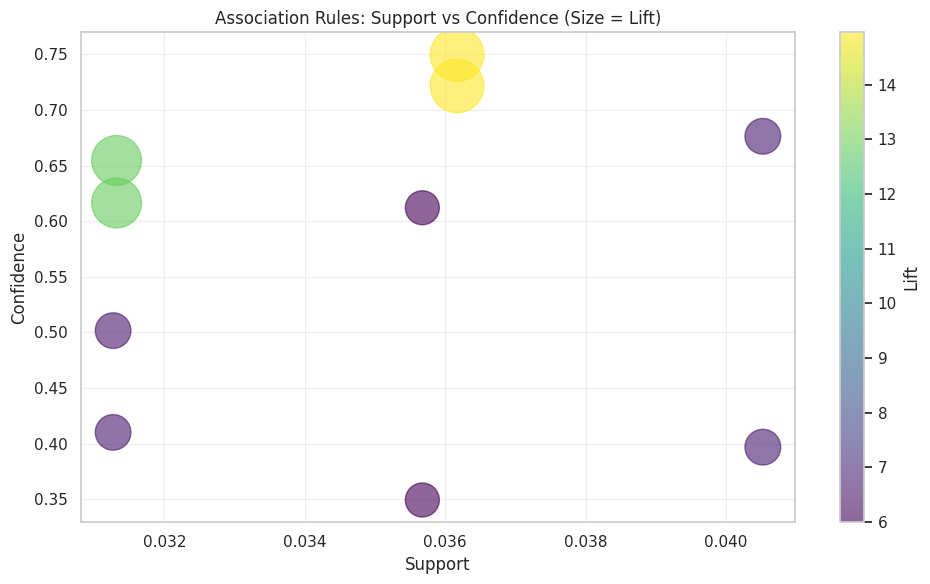

In [ ]:
# Visualize top rules by lift
top_rules = rules.head(10)

plt.figure(figsize=(10, 6))
plt.scatter(top_rules['support'], top_rules['confidence'],
            s=top_rules['lift']*100, alpha=0.6, c=top_rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Size = Lift)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Interpretation


**Interesting Rules:**
- People that bought "ROSES REGENCY TEACUP AND SAUCER" also have the tendency to continue buying the green version of the product.
- If customers have bought a jumbo bag, an alarm clock or lunch bag, they are likely to purchase another product but in differenyt colors.

**Business Implications:**
- Companies can used these insights to adjust the products they sell in order to make the most profit.

**Recommended Actions:**
- The current company should import more variations of products such as teacup/saucer, jumbo bag, alarm clock and lunch bag to earn more revenue.
- In the further future, they can analyse which kind of products are the best-sellers and import different variations of them to keep customers buying.

---

## Task 2 — Clustering Analysis

In this task, we'll apply clustering algorithms to group similar data points together.


### Load Dataset for Clustering


In [ ]:
# TODO: Load your dataset for clustering
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print(path)

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
/kaggle/input/customer-segmentation-tutorial-in-python


In [ ]:
df_cluster = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df_cluster

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Select Features for Clustering

In [ ]:
X = df_cluster[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
print("Features selected for clustering (X):")
display(X.head())

Features selected for clustering (X):


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Determine Optimal Number of Clusters (Elbow Method)


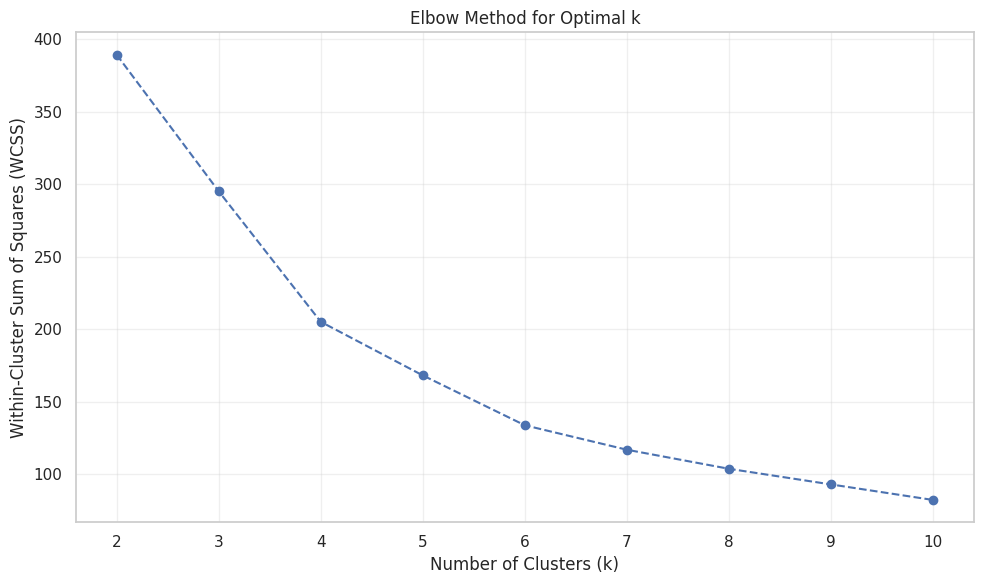

Elbow method completed


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate within-cluster sum of squares (WCSS) for different k values
k_range = range(2, 11)
wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Elbow method completed")


### Apply K-Means Clustering


In [ ]:
# Choose optimal k based on elbow method
optimal_k = 5  # Replace with your optimal k

# Apply K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_cluster['cluster_kmeans'] = clusters_kmeans

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Print cluster sizes
print("\nCluster Sizes:")
print(df_cluster['cluster_kmeans'].value_counts().sort_index())

print("K-means clustering completed")


Cluster Centers:
[[ 0.5310735  -1.2905084  -1.23646671]
 [-0.98067852 -0.74305983  0.46744035]
 [-0.42880597  0.97484722  1.21608539]
 [ 0.07333084  0.97494509 -1.19729675]
 [ 1.20484056 -0.23577338 -0.05236781]]

Cluster Sizes:
cluster_kmeans
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64
K-means clustering completed


### Visualize K-Means Clusters


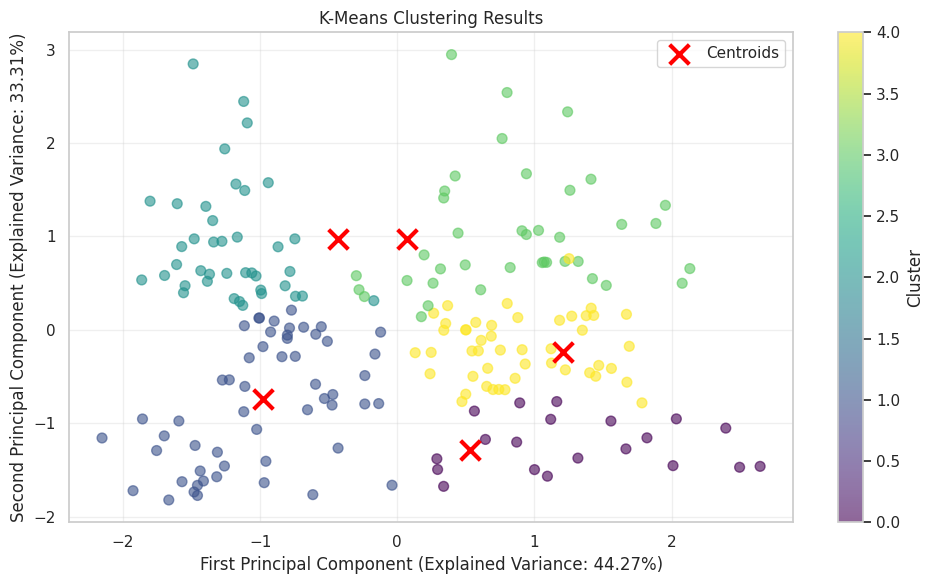

Visualization completed


In [ ]:
# Use PCA for 2D visualization if dataset has more than 2 features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans,
                      cmap='viridis', alpha=0.6, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel(f'First Principal Component (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Second Principal Component (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('K-Means Clustering Results')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualization completed")


### Apply DBSCAN Clustering


In [ ]:
# Apply DBSCAN
eps = 0.5  # Maximum distance between samples in the same neighborhood
min_samples = 5  # Minimum number of samples in a neighborhood

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Add cluster labels
df_cluster['cluster_dbscan'] = clusters_dbscan

# Print number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"\nCluster Sizes:")
print(pd.Series(clusters_dbscan).value_counts().sort_index())

print("DBSCAN clustering completed")


Number of clusters: 6
Number of noise points: 60

Cluster Sizes:
-1    60
 0    17
 1     5
 2    51
 3    28
 4    32
 5     7
Name: count, dtype: int64
DBSCAN clustering completed


### Compare K-Means and DBSCAN


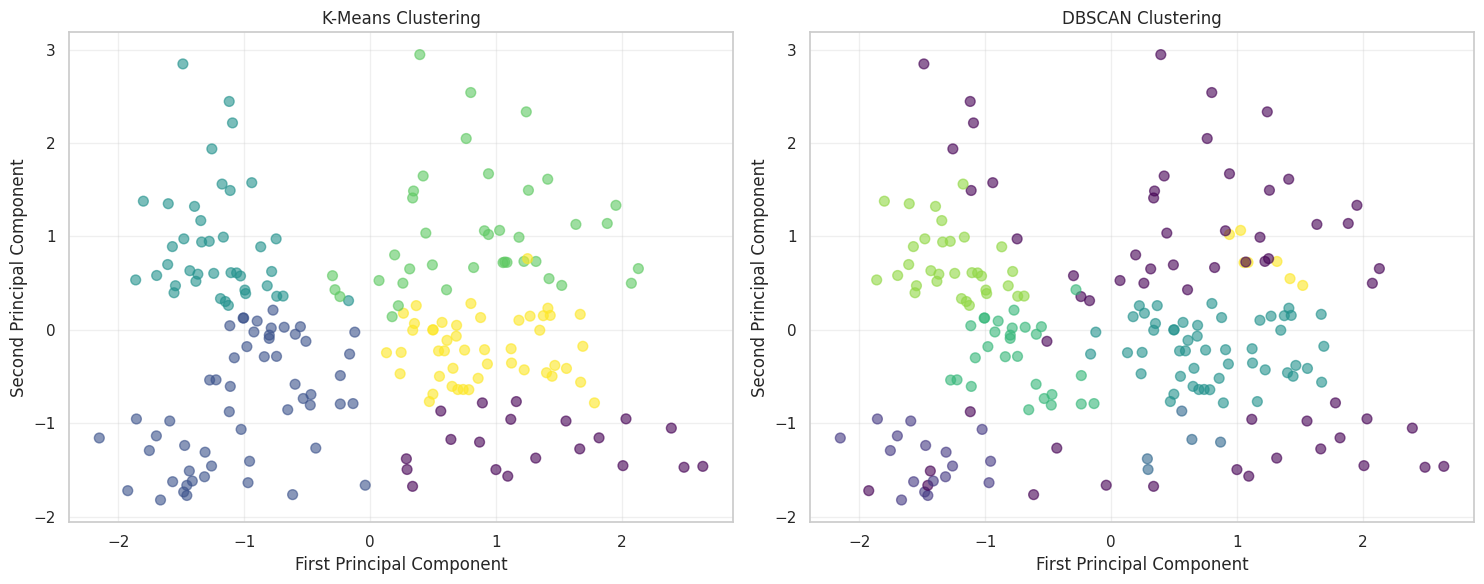

Comparison visualization completed


In [ ]:
# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# # K-Means
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans,
                          cmap='viridis', alpha=0.6, s=50)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].grid(True, alpha=0.3)

# DBSCAN
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_dbscan,
                           cmap='viridis', alpha=0.6, s=50)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Comparison visualization completed")


### Interpretation

**Cluster Characteristics:**
- Both K means and DBSCAN classifies two groups with lower/higher age but with lower income and spending, symbolizing very young and elderly people.
- For normal adults to middle-aged people they are split into 3 groups (K-means) and 4 groups (DBSCAN) based on their income and spending.

**When to use each method**
K-Means is good when:
- The goal is clear customer segments for business decisions
- We are accountin for every customers
- The business requires simple, interpretable clusters

DBSCAN is better when:
- We want to detect "anomoly" customers (e.g customers with extremely low income but high spending)
- There is much saturation between groups of customers.
- We want natural clusters based on density.

---

## Task 3 — Classification with Decision Trees

In this task, we'll build and evaluate a decision tree classifier.


### Load Classification Dataset


In [ ]:
path = kagglehub.dataset_download("uciml/iris")
print(path)


Using Colab cache for faster access to the 'iris' dataset.
/kaggle/input/iris


In [ ]:
df_class = pd.read_csv('/kaggle/input/iris/Iris.csv')
df_class.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Split Data into Training and Testing Sets


In [ ]:
X = df_class.drop(['Id', 'Species'], axis=1)
y = df_class['Species']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

print("Data split completed")


Training set size: 120
Test set size: 30
Data split completed


### Train Decision Tree Classifier


In [ ]:
# Train decision tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=10)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

print("Decision tree trained")


Decision Tree Accuracy: 0.9667
Decision tree trained


### Visualize Decision Tree


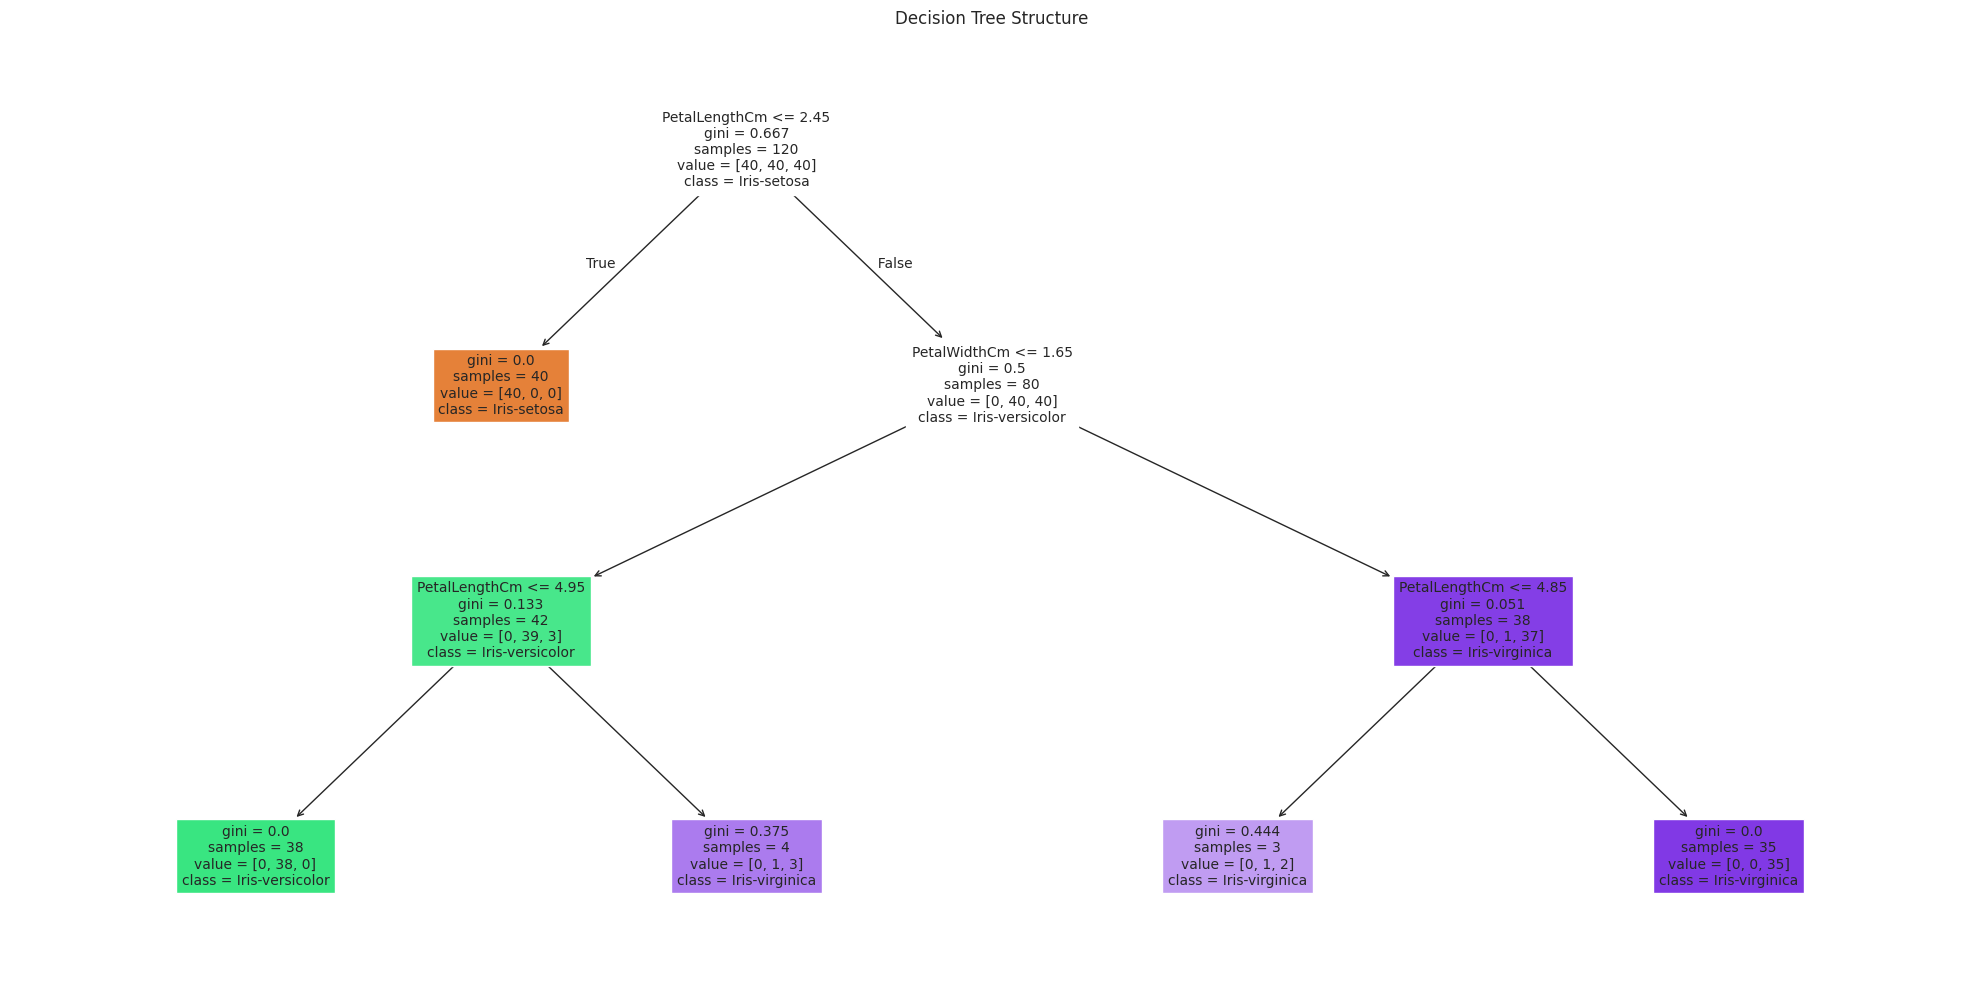

Tree visualization completed


In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns,
          class_names=[str(c) for c in np.unique(y)], fontsize=10)
plt.title('Decision Tree Structure')
plt.tight_layout()
plt.show()

print("Tree visualization completed")


### Evaluate Model Performance


In [ ]:
# Calculate metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Model evaluation completed")


Precision: 0.9697
Recall: 0.9667
F1-Score: 0.9666

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Model evaluation completed


### Confusion Matrix


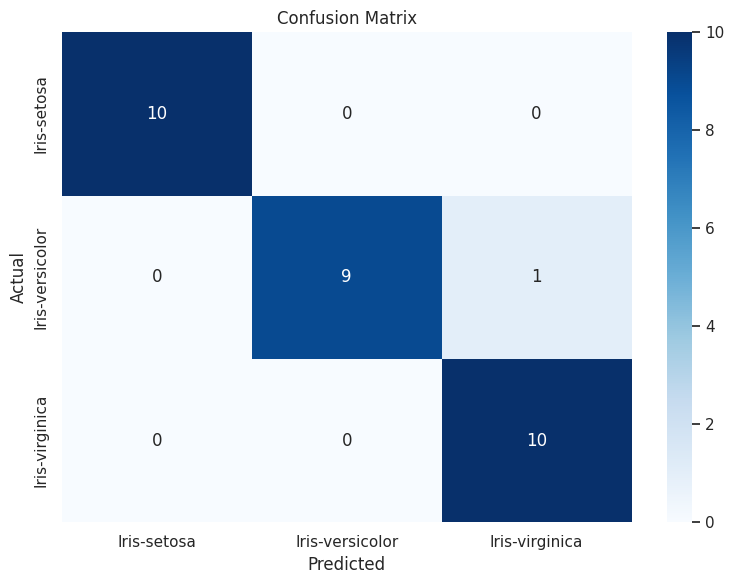

Confusion matrix created


In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print("Confusion matrix created")


### Feature Importance


Feature Importances:
         feature  importance
2  PetalLengthCm    0.579077
3   PetalWidthCm    0.420923
1   SepalWidthCm    0.000000
0  SepalLengthCm    0.000000


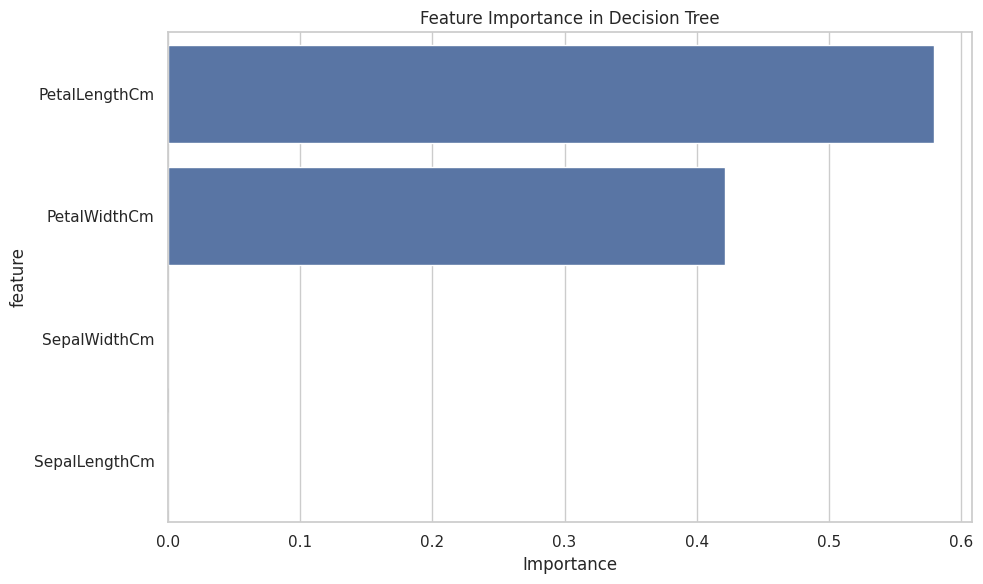

Feature importance analysis completed


In [ ]:
# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importances:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.tight_layout()
plt.show()

print("Feature importance analysis completed")


### Experiment with Different Parameters


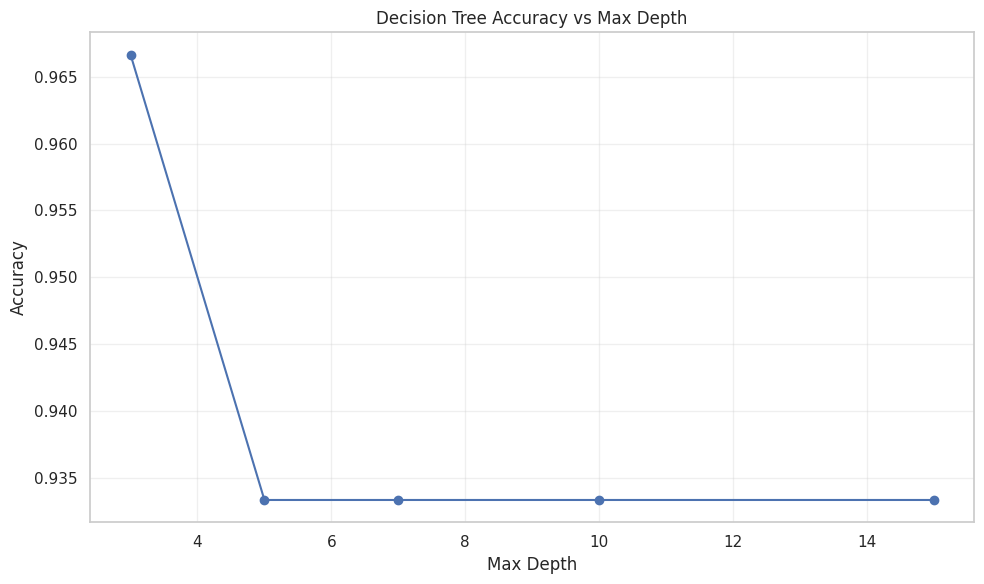

Parameter experimentation completed


In [ ]:
# Test different max_depth values
depths = [3, 5, 7, 10, 15]
accuracies = []

for depth in depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    y_pred_temp = dt_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Parameter experimentation completed")


### Interpretation

**Key Findings:**
- [Explain model performance]
- [Discuss most important features]
- [Analyze confusion matrix]
- [Recommend parameter settings]

**Model Performance:**
- The model is extremely accurate across diffferent types of iris flowers. This highlights either the power of the model or the lack of noise in the dataset.

**Most Important features:**
- The most important features are petal lengths and widths.
- This means that when distinguishable iris flowers, we just need to evaluate their petal.

**Confusion Matrix:**
- The model showed little confusion across the types of iris flowers. It indicates its high accuracy when classifying them.

**Recommended parameter settings:**
- The model achieves its greatest accuracy at the max depth of 3 and its lowest from 5 or above.

---

## Task 4 — Anomaly Detection

In this task, we'll identify anomalous data points using different detection methods.


### Load Dataset for Anomaly Detection


In [ ]:
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print(path)


Using Colab cache for faster access to the 'creditcardfraud' dataset.
/kaggle/input/creditcardfraud


In [ ]:
df_anom = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df_anom.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X_anomaly = df_anom.select_dtypes(include=[np.number])
# Standardize features
scaler_anomaly = StandardScaler()
X_anomaly_scaled = scaler_anomaly.fit_transform(X_anomaly)

### Apply Isolation Forest


In [ ]:
# Apply Isolation Forest
contamination = 0.1  # Expected proportion of anomalies (adjust based on your data)

iso_forest = IsolationForest(contamination=contamination, random_state=42)
anomalies_iso = iso_forest.fit_predict(X_anomaly_scaled)

# Convert to binary (1 = normal, -1 = anomaly)
anomalies_iso_binary = (anomalies_iso == -1).astype(int)

print(f"Number of anomalies detected: {sum(anomalies_iso_binary)}")
print(f"Percentage of anomalies: {sum(anomalies_iso_binary) / len(anomalies_iso_binary) * 100:.2f}%")

print("Isolation Forest completed")


Number of anomalies detected: 28481
Percentage of anomalies: 10.00%
Isolation Forest completed


### Apply Local Outlier Factor (LOF)


In [ ]:
# Apply LOF
n_neighbors = 20  # Number of neighbors to consider

lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
anomalies_lof = lof.fit_predict(X_anomaly_scaled)

# Convert to binary
anomalies_lof_binary = (anomalies_lof == -1).astype(int)

print(f"Number of anomalies detected: {sum(anomalies_lof_binary)}")
print(f"Percentage of anomalies: {sum(anomalies_lof_binary) / len(anomalies_lof_binary) * 100:.2f}%")

print("LOF completed")


Number of anomalies detected: 28481
Percentage of anomalies: 10.00%
LOF completed


### Visualize Anomalies


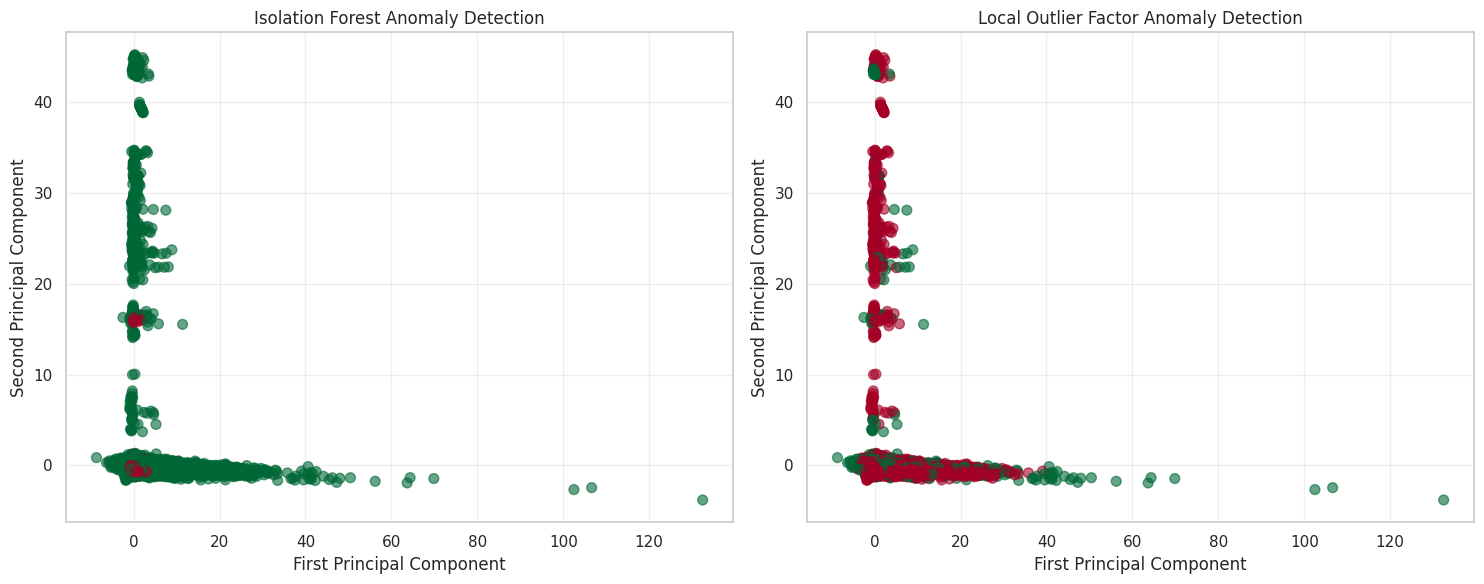

Anomaly visualization completed


In [ ]:
# Use PCA for 2D visualization
pca_anomaly = PCA(n_components=2)
X_anomaly_pca = pca_anomaly.fit_transform(X_anomaly_scaled)

# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# # Isolation Forest
scatter1 = axes[0].scatter(X_anomaly_pca[:, 0], X_anomaly_pca[:, 1],
                           c=anomalies_iso_binary, cmap='RdYlGn', alpha=0.6, s=50)
axes[0].set_title('Isolation Forest Anomaly Detection')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].grid(True, alpha=0.3)

# # LOF
scatter2 = axes[1].scatter(X_anomaly_pca[:, 0], X_anomaly_pca[:, 1],
                           c=anomalies_lof_binary, cmap='RdYlGn', alpha=0.6, s=50)
axes[1].set_title('Local Outlier Factor Anomaly Detection')
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Anomaly visualization completed")


### Compare Methods


In [ ]:
# Compare agreement between methods
agreement = (anomalies_iso_binary == anomalies_lof_binary).sum()
total = len(anomalies_iso_binary)

print(f"Agreement between methods: {agreement}/{total} ({agreement/total*100:.2f}%)")

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Isolation Forest': anomalies_iso_binary,
    'LOF': anomalies_lof_binary
})

print("\nComparison Summary:")
print(comparison_df.sum())

print("Method comparison completed")


Agreement between methods: 238251/284807 (83.65%)

Comparison Summary:
Isolation Forest    28481
LOF                 28481
dtype: int64
Method comparison completed


### Interpretation

**Key Findings:**
- [Explain detected anomalies]
- [Compare Isolation Forest vs LOF]
- [Discuss characteristics of anomalous points]

**Detected anomolies**:
- 28481 anomoly transactions were flagged by the model.

**Isolation Forest and LOF:**
- Speed: Isolation Forest is much faster than LOF when handling large datasets.
- Best case use: Isolation Forest for large data and LOF for local anomolies.
- Target: Isolation Forest detects global outliers while LOF detects local density anomalies.

**Characteristics of anomalous points:**
- Isolation Forest detected transactions with the most unusual amounts.
- LOF detects transactions with unuasual amounts in its respective group.

---

## Task 5 — Model Evaluation and Comparison

In this task, we'll compare multiple classification algorithms and select the best performing model.


**Getting the dataset**


In [ ]:
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
print(path)

Using Colab cache for faster access to the 'wine-quality-dataset' dataset.
/kaggle/input/wine-quality-dataset


In [ ]:
df_multi = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
df_multi

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:

# Split into training and testing sets
X_multi = df_multi.drop(['Id', 'quality'], axis=1)
y_multi = df_multi['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify = y_multi
)

### Train Multiple Classification Models


In [ ]:
# Train multiple models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
#
    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df.round(4))

print("Multiple models trained")


Model Comparison:
                     Accuracy  Precision  Recall  F1-Score
Decision Tree          0.5983     0.5621  0.5983    0.5759
Random Forest          0.7162     0.6822  0.7162    0.6939
K-Nearest Neighbors    0.4891     0.4653  0.4891    0.4710
Multiple models trained


### Cross-Validation


In [ ]:
# Perform cross-validation
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = {
        'Mean': scores.mean(),
        'Std': scores.std()
    }

cv_df = pd.DataFrame(cv_scores).T
print("Cross-Validation Results:")
print(cv_df.round(4))

print("Cross-validation completed")


Cross-Validation Results:
                       Mean     Std
Decision Tree        0.5613  0.0365
Random Forest        0.6433  0.0112
K-Nearest Neighbors  0.4814  0.0322
Cross-validation completed


### Visualize Model Comparison


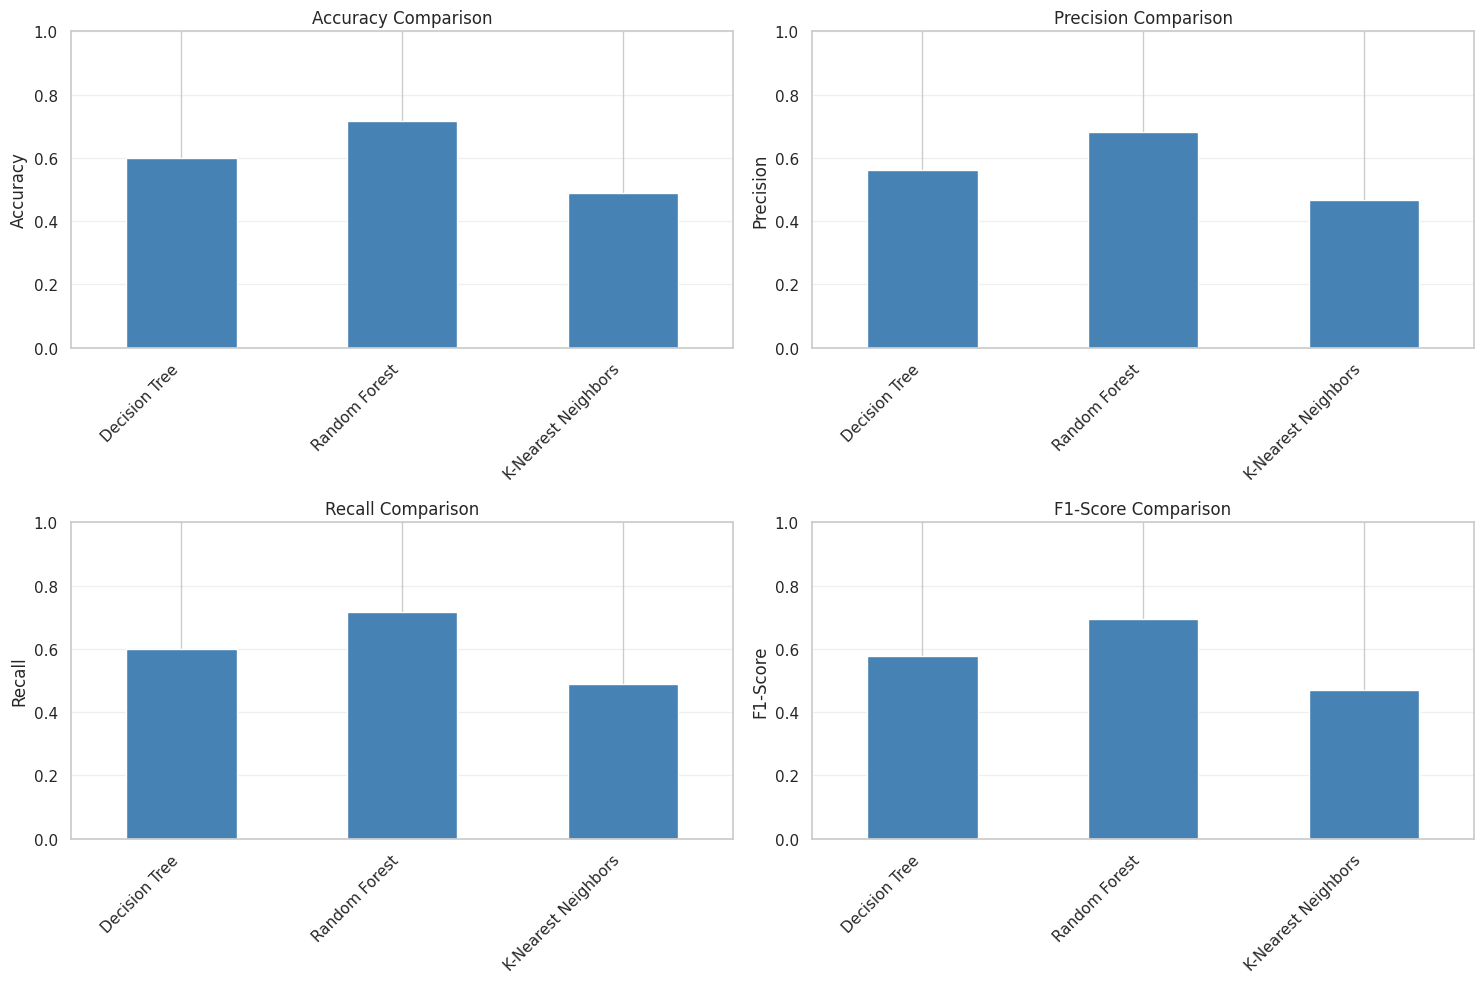

Comparison visualization completed


In [ ]:
# Create comparison bar chart
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    results_df[metric].plot(kind='bar', ax=ax, color='steelblue')
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_ylim([0, 1])
    ax.grid(True, alpha=0.3, axis='y')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Comparison visualization completed")


### ROC Curve (for Binary Classification)


In [ ]:
y_multi.unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# Create the binary target variable 'quality_binary'
df_multi['quality_binary'] = df_multi['quality'].apply(lambda x: 1  if x >= 7 else 0)

# Define features (X_multi) and the new binary target (y_multi)
X_multi = df_multi.drop(['Id', 'quality', 'quality_binary'], axis=1)
y_multi = df_multi['quality_binary']

# Re-split the data into training and testing sets with the binary target
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

print("Binary target variable created and data re-split successfully!")
print(f"Unique values in new y_multi: {y_multi.unique()}")
print(f"New training set target distribution:\n{y_train.value_counts()}")
print(f"New test set target distribution:\n{y_test.value_counts()}")

Binary target variable created and data re-split successfully!
Unique values in new y_multi: [0 1]
New training set target distribution:
quality_binary
0    787
1    127
Name: count, dtype: int64
New test set target distribution:
quality_binary
0    197
1     32
Name: count, dtype: int64


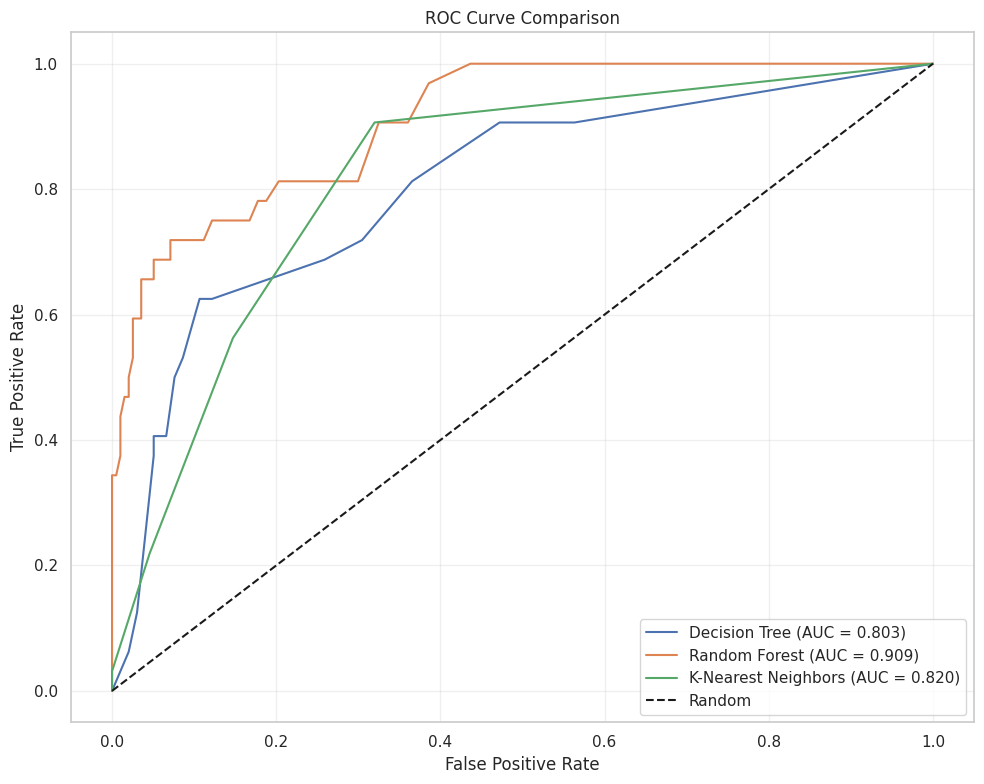

ROC curve analysis completed


In [ ]:
# For binary classification only
if len(np.unique(y_multi)) == 2:
    plt.figure(figsize=(10, 8))
#
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
#
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("ROC curve analysis completed")


### Select Best Model


In [ ]:
# Select best model based on F1-score (or your preferred metric)
best_model_name = results_df['F1-Score'].idxmax()
best_score = results_df.loc[best_model_name, 'F1-Score']

print(f"Best Model: {best_model_name}")
print(f"Best F1-Score: {best_score:.4f}")
print(f"\nAll Metrics for Best Model:")
print(results_df.loc[best_model_name])

print("Best model selected")


Best Model: Random Forest
Best F1-Score: 0.6939

All Metrics for Best Model:
Accuracy     0.716157
Precision    0.682175
Recall       0.716157
F1-Score     0.693910
Name: Random Forest, dtype: float64
Best model selected


### Interpretation

**Model Performance:**
- The Random Forest method has the highest ratings across all metrics tested while Decision Tree is seond-best.

**Why:**
- Random Forest can handle datasets with much noise and outliers (such as this one) well.
- Different with different scales are best handled by this methods.
- Can work with non-linear relationships.

**Recommend model for deployment:**
- Specifically for classifying kinds of wines, the Random Forest model is recommended since it can work with the wines' complicated feature effectively.

---

## Summary and Conclusions

This data mining exercise demonstrates essential techniques for pattern discovery and knowledge extraction:

1. **Association Rule Mining**: Discovered frequent patterns and relationships in transactional data
2. **Clustering**: Grouped similar data points using K-means and DBSCAN algorithms
3. **Classification**: Built and evaluated decision tree models for prediction
4. **Anomaly Detection**: Identified outliers using Isolation Forest and LOF methods
5. **Model Comparison**: Evaluated and compared multiple classification algorithms


*Findings:*
- Association rules models are excellent for business to figure customer trends.
- For clustering models, K-means and DBSCAN can perform effectively, but we should keep in mind when to choose which model.
- Decision tree is quite strong in terms of accuracy.
- When multiple classification models can be used for a task, we should carefully evaluate each one based on many metrics.

*Next steps:*
- Test the decision model on other classification datasets with much more noise.
- Work with problems that can be solve with all methods used in this lab and evaluate them.
